In [2]:
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC

############irisデータの取り込み###################
iris_dataset = load_iris()
#特徴量のセット:X
#教師データ:Y
X = iris_dataset.data  # sepal length, sepal width, petal length, petal width
Y = iris_dataset.target  # 'setosa'=0 'versicolor'=1 'virginica'=2
X = X[(Y == 1) | (Y == 2)]  # 簡単のため、2品種に絞る(（'versicolor'=1 'virginica'=2）
Y = Y[(Y == 1) | (Y == 2)]
X = X[:, :2]  # 説明変数:#sepal length, sepal width
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2)
# 80%のデータを学習データに、20%を検証データにする

#SVMモデルの設定
svm = SVC(kernel='linear')
#モデルの学習
svm.fit(X_train, Y_train)
#モデルを使ってテストデータのクラスを識別
Y_pred = svm.predict(X_test)
Y_pred_df = svm.decision_function(X_test)  # decision_functionは分類の確信度

print("正解:", Y_test)
print("予測結果:", Y_pred)
print("確信度:", Y_pred_df)


正解: [1 2 2 1 1 1 2 2 2 2 2 2 1 1 1 2 2 1 2 2]
予測結果: [1 2 1 2 1 2 2 2 1 1 2 2 1 1 2 1 2 1 2 2]
確信度: [-0.59333683  1.00000076 -0.90000434  0.12666509 -0.34666931  1.20666796
  0.33333229  0.43999917 -0.49333651 -1.16000498  0.33333229  0.28666541
 -1.52000594 -0.38666963  0.69333325 -0.90000434  0.90000044 -1.4666725
  2.60000491  0.23333197]


分類性能指標

In [3]:
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score

print('confusion matrix = \n', confusion_matrix(Y_test, Y_pred))
print('accuracy = ', accuracy_score(Y_test, Y_pred))
print('precision = ', precision_score(Y_test, Y_pred))
print('recall = ', recall_score(Y_test, Y_pred))
print('f1 score = ', f1_score(Y_test, Y_pred))


confusion matrix = 
 [[5 3]
 [4 8]]
accuracy =  0.65
precision =  0.5555555555555556
recall =  0.625
f1 score =  0.5882352941176471


ROC AUC

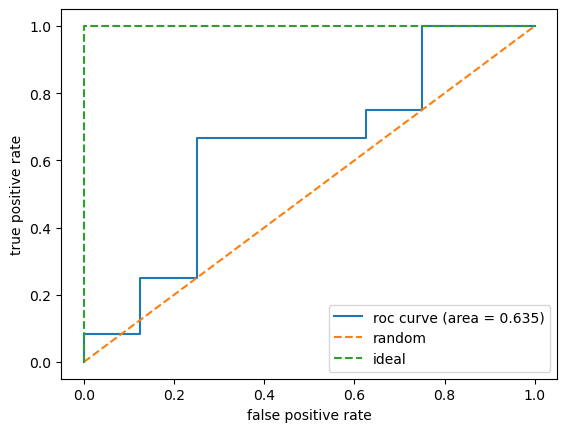

In [4]:
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

Y_test[Y_test == 1] = 0
Y_test[Y_test == 2] = 1
fpr, tpr, thresholds = roc_curve(Y_test,  Y_pred_df)

plt.plot(fpr, tpr, label='roc curve (area = %0.3f)' % auc(fpr, tpr))
plt.plot([0, 1], [0, 1], linestyle='--', label='random')
plt.plot([0, 0, 1], [0, 1, 1], linestyle='--', label='ideal')
plt.legend()
plt.xlabel('false positive rate')
plt.ylabel('true positive rate')
plt.show()
